In [889]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Домашнее задание №2

**Задача 1.** Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

**Подготовка данных**

Сгенерируем датасет

In [890]:
data, target = datasets.make_regression(n_samples=10, n_features = 2, n_informative = 2, n_targets = 1, noise = 1, coef = False, random_state = 2)

Отмасштабируем признаки методом стандартизации

In [891]:
means = np.mean(data, axis=0) #средние значения по столбцам
stds = np.std(data, axis=0) #стандартные отклонения по столбцам

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

Добавим к матрице признаков единичный столбец

In [892]:
ones = np.array([np.ones(data.shape[0])]).T
data = np.hstack((ones,data))

In [893]:
print(f'Матрица признаков data:\n {data} \n')
print(f'Вектор ответа target:\n {target} \n')

Матрица признаков data:
 [[ 1.          1.0951002   1.90719861]
 [ 1.         -0.65842662 -0.79764019]
 [ 1.          1.04217794 -1.0817774 ]
 [ 1.         -0.32057791 -0.02195645]
 [ 1.         -1.45977171 -0.74080924]
 [ 1.          0.040186   -0.07712441]
 [ 1.          0.53952325 -0.97416346]
 [ 1.         -1.83322604  1.35635004]
 [ 1.          1.08159445 -0.53330211]
 [ 1.          0.47342044  0.96322462]] 

Вектор ответа target:
 [ 44.54826046 -54.7056854    9.27241232 -29.69953679 -85.24526808
 -18.12891235 -10.43425975 -76.61041921  17.17001093  10.25431813] 



**Нормальное уравнение линейной регрессии**

Линейная регрессия $$a(x) = w_{0}+\sum^{d}_{i=1}w_{i}x^{i},$$ где веса вычисляются по формуле:
$$w = (X^{T}X)^{-1}X^{T}y.$$

In [894]:
w_norm = (np.linalg.inv(np.dot(data.T, data)) @ data.T @ target.T).T
print(f'Коэффициенты нормального уравнения линейной регрессии:\n {w_norm}')

Коэффициенты нормального уравнения линейной регрессии:
 [-19.35790797  39.22669893  11.27556093]


**Функция, вычисляющая среднеквадратичную ошибку (MSE)**

в матричной форме:
$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}$$ 
в векторной форме:
$$Q(w,x) = \frac{1}{l}\sum^{l}_{i=1}(\left \langle w,x_{i} \right \rangle-y_{i})^{2}.$$

In [895]:
def calc_mse(X, W, y):
    err = (np.linalg.norm(X.dot(W.T) - y.T, ord=2)) ** 2 / y.shape[0]
    return err

In [896]:
print(f'Значение mse для нормального уравнения линейной регрессии: {calc_mse(data, w_norm, target)}')

Значение mse для нормального уравнения линейной регрессии: 0.9116948599535222


**Обучение линейной модели (минимизация функционала ошибки) при помощи градиентного спуска**

In [897]:
# инициализируем начальный вектор весов
w = np.array([np.random.randn(data.shape[1])])

# список векторов весов после каждой итерации
w_list_gd = [w[0].copy()]
 
# список значений ошибок после каждой итерации
errors_gd = []
 
# шаг градиентного спуска
alpha = 0.01
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
 
np.random.seed(1234)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - alpha * (2 / target.shape[0]) * np.dot((np.dot(w, data.T) - np.array([target])),data)
    weight_dist = np.linalg.norm(new_w - w, ord=2)

    w_list_gd.append(new_w[0].copy())

    errors_gd.append(calc_mse(data, new_w[0], target))
         
    iter_num += 1
    w = new_w
    
w_list_gd = np.array(w_list_gd)
print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_gd[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 0.9117


Визуализируем изменение функционала ошибки

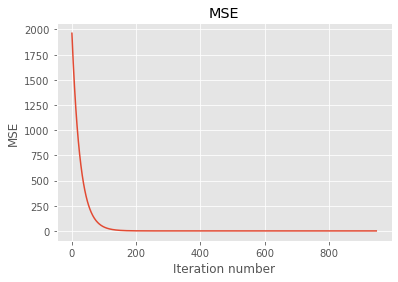

In [898]:
plt.plot(range(len(errors_gd)), errors_gd)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

Изменение монотонно и начинается с высокой точки, после определенного количества итераций выходя на асимптоту.

**Обучение линейной модели (минимизация функционала ошибки) при помощи стохастического градиентного спуска**

In [899]:
# инициализируем начальный вектор весов
w = np.random.randn(data.shape[1])

# список векторов весов после каждой итерации
w_list_sgd = [w.copy()]
 
# список значений ошибок после каждой итерации
errors_sgd = []
 
# шаг градиентного спуска
alpha = 0.01
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0 
 
np.random.seed(1234)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - alpha * (2 / target.shape[0]) * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind]))
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list_sgd.append(new_w.copy())
    errors_sgd.append(calc_mse(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list_sgd = np.array(w_list_sgd)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_sgd[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 0.9133


Визуализируем изменение функционала ошибки

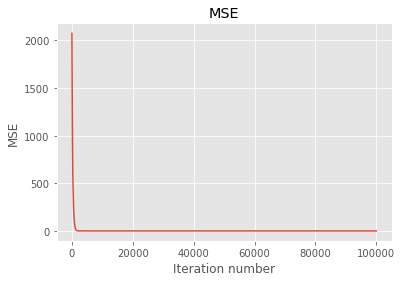

In [900]:
plt.plot(range(len(errors_sgd)), errors_sgd)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.show()

**Сравнение скорости сходимости градиентного и стохастического градиентного спусков**

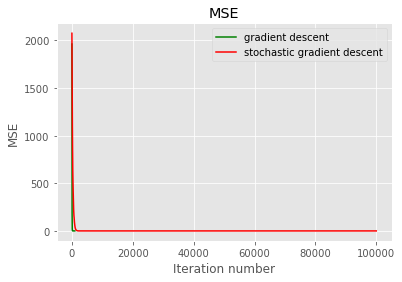

In [901]:
plt.plot(range(len(errors_gd)), errors_gd, label = 'gradient descent', color = 'g')
plt.plot(range(len(errors_sgd)), errors_sgd, label = 'stochastic gradient descent', color = 'r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

plt.show()

**Вывод:** Скорость сходимости градиентного спуска выше, чем у стохастического градиентного спуска. Значение MSE у стохастического градиентного спуска выше.

**Задача 2.** Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

Добавим в функцию, вычисляющую MSE, норму вектора весов

$$Q(w, X)^{*} = Q(w, X) + \lambda ||w||_{2}^{2}.$$


Тогда $k$-ый шаг градиентного спуска вычисляется по формуле:

$$w^{k} = w^{k-1} - \alpha(\nabla Q(w^{k-1}, X)^{*}) = $$

$$w^{k-1} - \alpha (\nabla (Q(w^{k-1}, X) + \lambda ||w||^{2}))=$$

$$w^{k-1} - \alpha (\frac{2}{l}X^{T}(Xw^{k-1}-y) + 2\lambda w).$$

**Градиентный спуск с $L_2$-регуляризацией**

In [902]:
# инициализируем начальный вектор весов
w = np.array([np.random.randn(data.shape[1])])

# список векторов весов после каждой итерации
w_list_gd_L2 = [w[0].copy()]
 
# список значений ошибок после каждой итерации
errors_gd_L2 = []

#коэффициент регуляризации
#если коэффициент регуляризации >=0, то модель слишком простая и ошибка MSE больше
#если коэффициент регуляризации <0, то MSE уходит в отрицательные значения
lamb = 0.2
 
# шаг градиентного спуска
alpha = 0.01
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
 
np.random.seed(1234)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - alpha * ((2 / target.shape[0]) * np.dot((np.dot(w, data.T) - np.array([target])),data) + 2 * lamb * w)
    weight_dist = np.linalg.norm(new_w - w, ord=2)

    w_list_gd_L2.append(new_w[0].copy())
    
    errors_gd_L2.append(calc_mse(data, new_w[0], target))
    #errors_gd_L2.append(calc_mse_L2(data, new_w[0], target, lamb))
         
    iter_num += 1
    w = new_w
    
w_list_gd_L2 = np.array(w_list_gd_L2)
print(f'В случае использования градиентного спуска c L_2-регуляризацией функционал ошибки составляет {round(errors_gd_L2[-1], 4)}')

В случае использования градиентного спуска c L_2-регуляризацией функционал ошибки составляет 58.5761


MSE градиентного спуска с $L_2$-регуляризацией и без

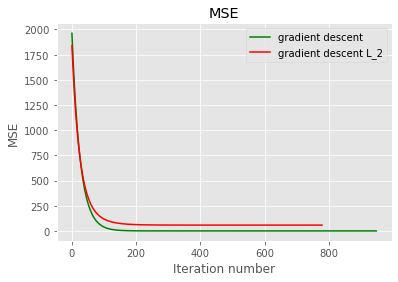

In [903]:
plt.plot(range(len(errors_gd)), errors_gd, label = 'gradient descent', color = 'g')
plt.plot(range(len(errors_gd_L2)), errors_gd_L2, label = 'gradient descent L_2', color = 'r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

plt.show()

Если коэффициент регуляризации $\lambda \ge 0$, то разница MSE и MSE с $L_2$-регулризацией велика. Получаем недообучение модели.

Чтобы значение MSE градиентного спуска с $L_2$-регуляризацией было близко к MSE градиентного спуска, надо брать значение $0\leq \lambda \leq 1$.

**Стохастический градиентный спуск с $L_2$-регуляризацией**

In [904]:
# инициализируем начальный вектор весов
w = np.random.randn(data.shape[1])

# список векторов весов после каждой итерации
w_list_sgd_L2 = [w.copy()]
 
# список значений ошибок после каждой итерации
errors_sgd_L2 = []

#если коэффициент регуляризации >=0, то модель слишком простая и ошибка MSE больше
#если коэффициент регуляризации <0, то MSE уходит в отрицательные значения
lamb = 0.2
 
# шаг градиентного спуска
alpha = 0.01
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0 
 
np.random.seed(1234)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - alpha * ((2 / target.shape[0]) * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) + 2 * lamb * w)
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list_sgd_L2.append(new_w.copy())
    errors_sgd_L2.append(calc_mse(data, new_w, target))
    #errors_sgd_L2.append(calc_mse_L2(data, new_w, target, lamb))
    
    iter_num += 1
    w = new_w
    
w_list_sgd_L2 = np.array(w_list_sgd_L2)
 
print(f'В случае использования стохастического градиентного спуска L_2-регуляризацией функционал ошибки составляет {round(errors_sgd_L2[-1], 4)}')

В случае использования стохастического градиентного спуска L_2-регуляризацией функционал ошибки составляет 895.7557


MSE стохастического градиентного спуска с $L_2$-регуляризацией и без

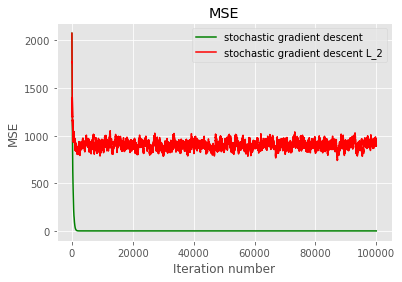

In [905]:
plt.plot(range(len(errors_sgd)), errors_sgd, label = 'stochastic gradient descent', color = 'g')
plt.plot(range(len(errors_sgd_L2)), errors_sgd_L2, label = 'stochastic gradient descent L_2', color = 'r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

plt.show()

Если коэффициент регулризации $\lambda \ge 0$, то разница MSE и MSE у стохастического градиентного спуска с $L_2$-регулризацией велика. Получаем недообучение модели.

**Сравнение скорости сходимости градиентного и стохастического градиентного спусков с $L_2$-регуляризацией**

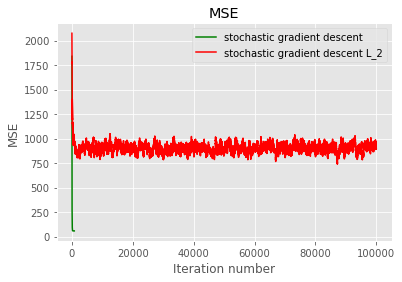

In [906]:
plt.plot(range(len(errors_gd_L2)), errors_gd_L2, label = 'stochastic gradient descent', color = 'g')
plt.plot(range(len(errors_sgd_L2)), errors_sgd_L2, label = 'stochastic gradient descent L_2', color = 'r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

plt.show()

**Вывод:** Значения MSE у градиентного и стохатического градиентного спусков с $L_2$-регуляризации существенно отличаются при одном и том же значении $\lambda$. Добавление $L_2$-регуляризации приводит к недообучению модели.

**Задача 3*.** Модернизировать решение задания 2, заменив $L_2$-регуляризацию на $L_1$-регуляризацию.

Добавим в функцию, вычисляющую MSE, норму вектора весов

$$Q(w, X)^* = Q(w, X) + \lambda ||w||_{1}.$$

Тогда $k$-ый шаг градиентного спуска вычисляется по формуле:

$$w^{k} = w^{k-1} - \alpha(\nabla Q(w^{k-1}, X)^{*}) = $$

$$w^{k-1} - \alpha (\nabla (Q(w^{k-1}, X) + \lambda ||w||_{1}))=$$

$$w^{k-1} - \alpha (\frac{2}{l}X^{T}(Xw^{k-1}-y) + \lambda sign(w)).$$

**Градиентный спуск с $L_1$-регуляризацией**

In [907]:
# инициализируем начальный вектор весов
w = np.array([np.random.randn(data.shape[1])])

# список векторов весов после каждой итерации
w_list_gd_L1 = [w[0].copy()]
 
# список значений ошибок после каждой итерации
errors_gd_L1 = []

#коэффициент регуляризации
lamb = 0.2
 
# шаг градиентного спуска
alpha = 0.01
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
 
np.random.seed(1234)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - alpha * ((2 / target.shape[0]) * np.dot((np.dot(w, data.T) - np.array([target])),data) + lamb * np.sign(w))
    weight_dist = np.linalg.norm(new_w - w, ord=2)

    w_list_gd_L1.append(new_w[0].copy())
    errors_gd_L1.append(calc_mse(data, new_w[0], target))
    #errors_gd_L2.append(calc_mse_L2(data, new_w[0], target, lamb))
         
    iter_num += 1
    w = new_w
    
w_list_gd_L1 = np.array(w_list_gd_L1)
print(f'В случае использования градиентного спуска c L_1-регуляризацией функционал ошибки составляет {round(errors_gd_L1[-1], 4)}')

В случае использования градиентного спуска c L_1-регуляризацией функционал ошибки составляет 0.9429


MSE градиентного спуска с $L_1$-регуляризацией и без

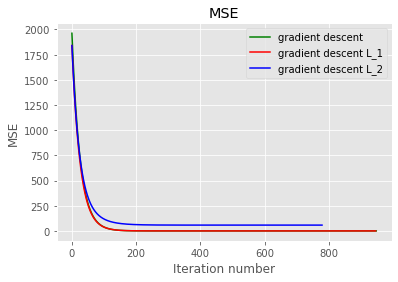

In [908]:
plt.plot(range(len(errors_gd)), errors_gd, label = 'gradient descent', color = 'g')
plt.plot(range(len(errors_gd_L1)), errors_gd_L1, label = 'gradient descent L_1', color = 'r')
plt.plot(range(len(errors_gd_L2)), errors_gd_L2, label = 'gradient descent L_2', color = 'b')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

plt.show()

Если коэффициент регуляризации $\lambda \ge 0$, то разница MSE и MSE у градиентного спуска с $L_1$-регулризацией велика. Получаем недообучение модели.

Чтобы значение MSE градиентного спуска с $L_1$-регуляризацией было близко к MSE градиентного спуска, надо брать значение $0\leq \lambda \leq 1$. Градиентный спуск с $L_1$-регуляризацией приводит к недообучению модели.

При одном и том же значении $\lambda$ значение MSE у градиентного спуска c $L_1$-регуляризацией ниже, чем аналогичное значение у градиентного спуска с $L_2$-регуляризацией.

**Стохастический градиентный спуск с $L_1$-регуляризацией**

In [909]:
# инициализируем начальный вектор весов
w = np.random.randn(data.shape[1])

# список векторов весов после каждой итерации
w_list_sgd_L1 = [w.copy()]
 
# список значений ошибок после каждой итерации
errors_sgd_L1 = []

# коэффициент регуляризации
lamb = 0.2
 
# шаг градиентного спуска
alpha = 0.01
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0 
 
np.random.seed(1234)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - alpha * ((2 / target.shape[0]) * np.dot((np.dot(w, data.T) - np.array([target])),data) + lamb*np.sign(w))
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list_sgd_L1.append(new_w[0].copy())
    errors_sgd_L1.append(calc_mse(data, new_w, target))
    #errors_sgd_L2.append(calc_mse_L2(data, new_w, target, lamb))
    
    iter_num += 1
    w = new_w
    
w_list_sgd_L1 = np.array(w_list_sgd_L1)
 
print(f'В случае использования стохастического градиентного спуска L_1-регуляризацией функционал ошибки составляет {round(errors_sgd_L1[-1], 4)}')

В случае использования стохастического градиентного спуска L_1-регуляризацией функционал ошибки составляет 16184.5689


MSE стохастического градиентного спуска с $L_1$-регуляризацией и без

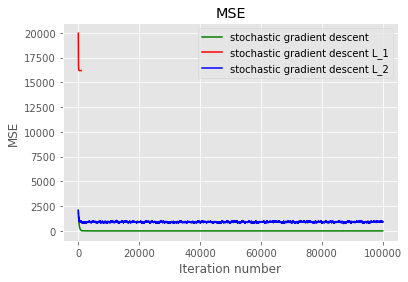

In [910]:
plt.plot(range(len(errors_sgd)), errors_sgd, label = 'stochastic gradient descent', color = 'g')
plt.plot(range(len(errors_sgd_L1)), errors_sgd_L1, label = 'stochastic gradient descent L_1', color = 'r')
plt.plot(range(len(errors_sgd_L2)), errors_sgd_L2, label = 'stochastic gradient descent L_2', color = 'b')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

plt.show()

Использование $L_1$-регуляризации с стохастическим градиентным спуском приводит к повышению значения MSE и недообучению модели. 

У стохастического градиентного спука без регуляризации скорость сходимости выше. Регуляризации $L_1$ и $L_2$ приводят к недообучению модели.

**Сравнение скорости сходимости градиентного и стохастического градиентного спусков с $L_1$-регуляризацией**

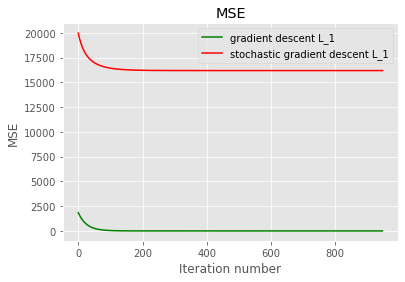

In [911]:
plt.plot(range(len(errors_gd_L1)), errors_gd_L1, label = 'gradient descent L_1', color = 'g')
plt.plot(range(len(errors_sgd_L1)), errors_sgd_L1, label = 'stochastic gradient descent L_1', color = 'r')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

plt.show()

Стохастический градиентный спуск с $L_1$-регуляризацией приводит к недообучению модели.

**Вывод:** добавление $L_1$-регуляризации к градиентному и стохастическому градиентному спускам приводит к недообучению модели.

**Таким образом, лучший показатель MSE получается при обучении линейной модели при помощи градиентного спуска. Линейная модель легко обучается и позволяет работать с зашумленными данными (небольшими выборками), контролируя при этом риск переобучения. Поэтому добавление регуляризации (уменьшение сложности модели) приводит к недообучению.**